In [17]:
import pandas as pd
import time
from pathlib import Path
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from sklearn.metrics import roc_auc_score
from plottable.plots import image
import re
import matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image
from matplotlib.colors import BoundaryNorm
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [259]:
import pandas as pd
import time
league_ids = [9,12,20,11,13,56,23,32,37,63,66,40,54,57,39]
league_ids
url = 'https://fbref.com/en/comps/{}/{}-{}'
years = range(2019,2024)
df_list = []
for _id in league_ids:
    for year in years:
        new_url = url.format(_id, year,year+1)
        all_df = pd.read_html(new_url)[0]
        time.sleep(3)
        df_list.append(all_df)

In [248]:
pd.concat(df_list, ignore_index=True)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,38,32,3,3,85,33,52,99,2.61,68.9,37.7,31.2,0.82,41955,Mohamed Salah - 19,Alisson,→ Champions League via league finish
1,2,Manchester City,38,26,3,9,102,35,67,81,2.13,92.0,36.2,55.7,1.47,37097,Raheem Sterling - 20,Ederson,→ Champions League via league finish
2,3,Manchester Utd,38,18,12,8,66,36,30,66,1.74,62.2,37.7,24.5,0.64,57415,"Anthony Martial, Marcus Rashford - 17",David de Gea,→ Champions League via league finish
3,4,Chelsea,38,20,6,12,69,54,15,66,1.74,69.2,38.6,30.6,0.81,32023,Tammy Abraham - 15,Kepa Arrizabalaga,→ Champions League via league finish
4,5,Leicester City,38,18,8,12,67,41,26,62,1.63,62.2,45.5,16.7,0.44,25312,Jamie Vardy - 23,Kasper Schmeichel,→ Europa League via league finish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16,Brentford,38,10,9,19,56,65,-9,39,1.03,58.2,56.0,2.2,0.06,17082,Yoane Wissa - 12,Mark Flekken,NaN
96,17,Nott'ham Forest,38,9,9,20,49,67,-18,32,0.84,49.9,53.2,-3.3,-0.09,29386,Chris Wood - 14,Matt Turner,4-point deduction 2
97,18,Luton Town,38,6,8,24,52,85,-33,26,0.68,42.4,78.0,-35.5,-0.94,11240,Carlton Morris - 11,Thomas Kaminski,Relegated
98,19,Burnley,38,5,9,24,41,78,-37,24,0.63,40.6,70.4,-29.7,-0.78,21184,Jacob Bruun Larsen - 6,James Trafford,Relegated


In [172]:
teams = ["Arsenal", "Aston Villa", "Liverpool", "Manchester City",
"Atlético Madrid", "Barcelona", "Girona", "Real Madrid",
"Bayern Munich", "Dortmund", "Leverkusen", "Stuttgart", "RB Leipzig",
"Atalanta", "Bologna", "Inter", "Juventus", "Milan",
"Brest", "Lille", "Monaco", "Paris S-G",
"RB Salzburg", "Sturm Graz",
"PSV Eindhoven", "Feyenoord",
"Benfica", "Sporting CP",
"Club Brugge",
"Dinamo Zagreb",
"Sparta Prague",
"Celtic",
"Red Star",
"Young Boys",
"Shakhtar"]

In [173]:
df = all_df[all_df['Squad'].isin(teams)]

In [174]:
df

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1.0,Manchester City,38.0,28.0,7.0,3.0,96.0,34.0,62.0,91.0,2.39,80.5,35.6,44.9,1.18,53012.0,Erling Haaland - 27,Ederson,→ Champions League via league finish
1,2.0,Arsenal,38.0,28.0,5.0,5.0,91.0,29.0,62.0,89.0,2.34,76.1,27.9,48.2,1.27,60236.0,Bukayo Saka - 16,David Raya,→ Champions League via league finish
2,3.0,Liverpool,38.0,24.0,10.0,4.0,86.0,41.0,45.0,82.0,2.16,87.8,45.7,42.0,1.11,55979.0,Mohamed Salah - 18,Alisson,→ Champions League via league finish
3,4.0,Aston Villa,38.0,20.0,8.0,10.0,76.0,61.0,15.0,68.0,1.79,63.3,59.9,3.4,0.09,41858.0,Ollie Watkins - 19,Emiliano Martínez,→ Champions League via league finish
20,1.0,Real Madrid,38.0,29.0,8.0,1.0,87.0,26.0,61.0,95.0,2.50,68.8,35.4,33.4,0.88,72061.0,Jude Bellingham - 19,Andriy Lunin,→ Champions League via league finish
21,2.0,Barcelona,38.0,26.0,7.0,5.0,79.0,44.0,35.0,85.0,2.24,77.6,41.6,35.9,0.94,39846.0,Robert Lewandowski - 19,Marc-André ter Stegen,→ Champions League via league finish
22,3.0,Girona,38.0,25.0,6.0,7.0,85.0,46.0,39.0,81.0,2.13,70.8,54.3,16.5,0.43,12520.0,Artem Dovbyk - 24,Paulo Gazzaniga,→ Champions League via league finish
23,4.0,Atlético Madrid,38.0,24.0,4.0,10.0,70.0,43.0,27.0,76.0,2.00,62.4,39.5,23.0,0.60,59121.0,Antoine Griezmann - 16,Jan Oblak,→ Champions League via league finish
40,1.0,Leverkusen,34.0,28.0,6.0,0.0,89.0,24.0,65.0,90.0,2.65,73.6,29.9,43.7,1.29,29994.0,Victor Boniface - 14,Lukáš Hrádecký,→ Champions League via league finish
41,2.0,Stuttgart,34.0,23.0,4.0,7.0,78.0,39.0,39.0,73.0,2.15,70.9,38.1,32.7,0.96,55089.0,Serhou Guirassy - 28,Alexander Nübel,→ Champions League via league finish


In [3]:
df = pd.read_csv('/Users/calvi/Downloads/CL.csv')

In [152]:
df

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,...,QF,SF,F,Winner,Make_16,Make_QF,Make_SF,Make_F,Might_Win,Champions_League_Success
0,Liverpool,38,32,3,3,85,33,52,99,2.61,...,2,1,1,0,1,1,1,1,0,15
1,Liverpool,38,20,9,9,68,42,26,69,1.82,...,2,1,1,0,1,1,1,1,0,15
2,Liverpool,38,28,8,2,94,26,68,92,2.42,...,2,1,1,0,1,1,1,1,0,15
3,Liverpool,38,19,10,9,75,47,28,67,1.76,...,2,1,1,0,1,1,1,1,0,15
4,Liverpool,38,24,10,4,86,41,45,82,2.16,...,2,1,1,0,1,1,1,1,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Shakhtar,26,16,6,4,54,19,35,54,2.08,...,0,0,0,0,0,0,0,0,0,0
195,Shakhtar,18,15,2,1,49,10,39,47,2.61,...,0,0,0,0,0,0,0,0,0,0
196,Shakhtar,30,22,6,2,69,21,48,72,2.40,...,0,0,0,0,0,0,0,0,0,0
197,Shakhtar,30,22,5,3,63,24,39,71,2.37,...,0,0,0,0,0,0,0,0,0,0


In [121]:
coefficients = pd.DataFrame({
    'League': ['England', 'Spain', 'Italy', 'Germany', 'France',
               'Netherlands', 'Portugal', 'Belgium', 'Czechia', 
               'Austria', 'Switzerland', 'Scotland', 'Croatia', 
               'Serbia', 'Ukraine'],
    'Coefficient': [85.874, 75.481, 70.846, 68.160, 55.665,
                    52.900, 48.216, 43.400, 37.650, 
                    28.600, 28.775, 27.300, 23.525, 
                    22.475, 21.600]
})

In [122]:
team_leagues = pd.DataFrame({
    'Squad': ['Arsenal', 'Liverpool', 'Manchester City', 'Aston Villa', 'Barcelona', 'Real Madrid', 'Atlético Madrid', 'Girona',
              'Bayern Munich', 'Dortmund', 'Leverkusen', 'Stuttgart', 'Atalanta',
              'Bologna', 'Inter', 'Juventus', 'Milan', 'Brest', 'Lille', 'Monaco',
              'Paris S-G', 'RB Salzburg', 'Sturm Graz', 'PSV Eindhoven', 'Feyenoord',
              'Benfica', 'Sporting CP', 'Club Brugge', 'Dinamo Zagreb', 'Sparta Prague',
              'Celtic', 'Red Star', 'Young Boys', 'Shakhtar'],
    'League': ['England', 'England', 'England', 'England', 'Spain', 'Spain', 'Spain', 'Spain',
               'Germany', 'Germany', 'Germany', 'Germany', 'Italy',
               'Italy', 'Italy', 'Italy', 'Italy', 'France', 'France',
               'France', 'France', 'Austria', 'Austria', 'Netherlands',
               'Netherlands', 'Portugal', 'Portugal', 'Belgium', 'Croatia',
               'Czechia', 'Scotland', 'Serbia', 'Switzerland', 'Ukraine']
})

In [123]:
df_with_leagues = df_dropped.merge(team_leagues, on='Squad')

In [124]:
df_with_leagues

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,league_id,year,League
0,Liverpool,38.0,32.0,3.0,3.0,85.0,33.0,52.0,99.0,2.61,68.9,37.7,31.2,0.82,9,2019,England
1,Liverpool,38.0,20.0,9.0,9.0,68.0,42.0,26.0,69.0,1.82,67.5,43.0,24.5,0.65,9,2020,England
2,Liverpool,38.0,28.0,8.0,2.0,94.0,26.0,68.0,92.0,2.42,88.7,33.8,54.9,1.45,9,2021,England
3,Liverpool,38.0,19.0,10.0,9.0,75.0,47.0,28.0,67.0,1.76,71.5,50.8,20.7,0.55,9,2022,England
4,Liverpool,38.0,24.0,10.0,4.0,86.0,41.0,45.0,82.0,2.16,87.8,45.7,42.0,1.11,9,2023,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Shakhtar,26.0,16.0,6.0,4.0,54.0,19.0,35.0,54.0,2.08,NaN,NaN,NaN,NaN,39,2020,Ukraine
196,Shakhtar,18.0,15.0,2.0,1.0,49.0,10.0,39.0,47.0,2.61,NaN,NaN,NaN,NaN,39,2021,Ukraine
197,Shakhtar,30.0,22.0,6.0,2.0,69.0,21.0,48.0,72.0,2.40,NaN,NaN,NaN,NaN,39,2022,Ukraine
198,Shakhtar,30.0,22.0,5.0,3.0,63.0,24.0,39.0,71.0,2.37,NaN,NaN,NaN,NaN,39,2023,Ukraine


In [49]:
# Merge df_dropped with coefficient data
df_with_coeff = df_with_leagues.merge(coefficients, on='League')

In [50]:
df_with_coeff

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,league_id,year,League,Coefficient
0,Liverpool,38.0,32.0,3.0,3.0,85.0,33.0,52.0,99.0,2.61,68.9,37.7,31.2,0.82,9,2019,England,85.874
1,Liverpool,38.0,20.0,9.0,9.0,68.0,42.0,26.0,69.0,1.82,67.5,43.0,24.5,0.65,9,2020,England,85.874
2,Liverpool,38.0,28.0,8.0,2.0,94.0,26.0,68.0,92.0,2.42,88.7,33.8,54.9,1.45,9,2021,England,85.874
3,Liverpool,38.0,19.0,10.0,9.0,75.0,47.0,28.0,67.0,1.76,71.5,50.8,20.7,0.55,9,2022,England,85.874
4,Liverpool,38.0,24.0,10.0,4.0,86.0,41.0,45.0,82.0,2.16,87.8,45.7,42.0,1.11,9,2023,England,85.874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Shakhtar,26.0,16.0,6.0,4.0,54.0,19.0,35.0,54.0,2.08,NaN,NaN,NaN,NaN,39,2020,Ukraine,21.600
196,Shakhtar,18.0,15.0,2.0,1.0,49.0,10.0,39.0,47.0,2.61,NaN,NaN,NaN,NaN,39,2021,Ukraine,21.600
197,Shakhtar,30.0,22.0,6.0,2.0,69.0,21.0,48.0,72.0,2.40,NaN,NaN,NaN,NaN,39,2022,Ukraine,21.600
198,Shakhtar,30.0,22.0,5.0,3.0,63.0,24.0,39.0,71.0,2.37,NaN,NaN,NaN,NaN,39,2023,Ukraine,21.600


In [51]:
df = df_with_coeff

In [52]:
df

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,league_id,year,League,Coefficient
0,Liverpool,38.0,32.0,3.0,3.0,85.0,33.0,52.0,99.0,2.61,68.9,37.7,31.2,0.82,9,2019,England,85.874
1,Liverpool,38.0,20.0,9.0,9.0,68.0,42.0,26.0,69.0,1.82,67.5,43.0,24.5,0.65,9,2020,England,85.874
2,Liverpool,38.0,28.0,8.0,2.0,94.0,26.0,68.0,92.0,2.42,88.7,33.8,54.9,1.45,9,2021,England,85.874
3,Liverpool,38.0,19.0,10.0,9.0,75.0,47.0,28.0,67.0,1.76,71.5,50.8,20.7,0.55,9,2022,England,85.874
4,Liverpool,38.0,24.0,10.0,4.0,86.0,41.0,45.0,82.0,2.16,87.8,45.7,42.0,1.11,9,2023,England,85.874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Shakhtar,26.0,16.0,6.0,4.0,54.0,19.0,35.0,54.0,2.08,NaN,NaN,NaN,NaN,39,2020,Ukraine,21.600
196,Shakhtar,18.0,15.0,2.0,1.0,49.0,10.0,39.0,47.0,2.61,NaN,NaN,NaN,NaN,39,2021,Ukraine,21.600
197,Shakhtar,30.0,22.0,6.0,2.0,69.0,21.0,48.0,72.0,2.40,NaN,NaN,NaN,NaN,39,2022,Ukraine,21.600
198,Shakhtar,30.0,22.0,5.0,3.0,63.0,24.0,39.0,71.0,2.37,NaN,NaN,NaN,NaN,39,2023,Ukraine,21.600


In [53]:
for index, row in df.iterrows():
    if pd.isna(row['xG']):
        df.at[index, 'xG'] = row['GF']

In [54]:
for index, row in df.iterrows():
    if pd.isna(row['xGA']):
        df.at[index, 'xGA'] = row['GA']

In [56]:
# Example of coefficient adjustment
df['Adjusted_Pts'] = df['Pts'] * (df['Coefficient'] / df['Coefficient'].mean())
df['Adjusted_xG'] = df['xG'] * (df['Coefficient'] / df['Coefficient'].mean())
df['Adjusted_GD'] = df['GD'] * (df['Coefficient'] / df['Coefficient'].mean())

In [57]:
df['Adjusted_Pts'] = df['Adjusted_Pts'] / df['MP']
df['Adjusted_xG'] = df['Adjusted_xG'] / df['MP']
df['Adjusted_GD'] = df['Adjusted_GD'] / df['MP']

In [58]:
df.sort_values(by='Adjusted_Pts', ascending=False)

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,...,xGA,xGD,xGD/90,league_id,year,League,Coefficient,Adjusted_Pts,Adjusted_xG,Adjusted_GD
11,Manchester City,4.0,4.0,0.0,0.0,11.0,3.0,8.0,12.0,3.00,...,2.9,6.3,1.57,9,2024,England,85.874,4.496006,3.446938,2.997337
35,Barcelona,5.0,5.0,0.0,0.0,17.0,4.0,13.0,15.0,3.00,...,4.2,8.7,1.75,12,2024,Spain,75.481,3.951871,3.398609,3.424955
0,Liverpool,38.0,32.0,3.0,3.0,85.0,33.0,52.0,99.0,2.61,...,37.7,31.2,0.82,9,2019,England,85.874,3.904426,2.717323,2.050810
17,Arsenal,4.0,3.0,1.0,0.0,6.0,1.0,5.0,10.0,2.50,...,4.2,0.8,0.20,9,2024,England,85.874,3.746671,1.873336,1.873336
8,Manchester City,38.0,29.0,6.0,3.0,99.0,26.0,73.0,93.0,2.45,...,24.6,64.0,1.68,9,2021,England,85.874,3.667794,3.498208,2.879021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Brest,4.0,1.0,0.0,3.0,6.0,10.0,-4.0,3.0,0.75,...,8.3,-2.0,-0.50,13,2024,France,55.665,0.728597,1.530054,-0.971463
199,Shakhtar,5.0,3.0,0.0,2.0,14.0,7.0,7.0,9.0,1.80,...,7.0,NaN,NaN,39,2024,Ukraine,21.600,0.678532,1.055494,0.527747
128,Sturm Graz,32.0,10.0,5.0,17.0,46.0,60.0,-14.0,35.0,1.09,...,60.0,NaN,NaN,56,2019,Austria,28.600,0.545919,0.717493,-0.218367
193,Young Boys,6.0,0.0,3.0,3.0,7.0,14.0,-7.0,3.0,0.50,...,14.0,NaN,NaN,57,2024,Switzerland,28.775,0.251090,0.585876,-0.585876


In [ ]:
df['Champions_League_Success'] = df['RO16\t'] + df['QF'] * 2 + df['SF'] * 3 + df['F'] * 4 + df['Winner'] * 5

In [129]:
df.columns = df.columns.str.strip()

In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

features = ['Adjusted_Pts', 'Adjusted_xG', 'Adjusted_GD', 'RO16', 'QF', 'SF', 'F', 'Winner']
targets = ['Make_16', 'Make_QF', 'Make_SF', 'Make_F', 'Might_Win']

X = df[features]
y = df[targets]


# Splitting data into training (2019-2023) and testing (2024)
df_train = df[df['year'] <= 2023]
df_test = df[df['year'] == 2024]

X_train = df_train[features]
y_train = df_train[targets]
X_test = df_test[features]
y_test = df_test[targets]

# Creating the model
base_model = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)
multi_target_model = MultiOutputClassifier(base_model, n_jobs=-1)
multi_target_model.fit(X_train, y_train)

# Make predictions and convert probabilities to percentages
probs = {}
for i, target in enumerate(targets):
    # Get the raw probabilities
    prob = multi_target_model.estimators_[i].predict_proba(X_test)[:, 1] * 100
    
    noise = np.random.normal(0, .5, prob.shape)  
    prob = np.clip(prob + noise, 0, 99.5)

    # Apply more aggressive scaling for later stages
    if target == 'Make_16':
        prob *= 0.8  # Reduce RO16 chances by 20%
    elif target == 'Make_QF':
        prob *= 0.6  # Reduce QF chances by 40%
    elif target == 'Make_SF':
        prob *= 0.5  # Reduce SF chances by 50%
    elif target == 'Make_F':
        prob *= 0.4  # Reduce Final chances by 60%
    elif target == 'Might_Win':
        prob *= 0.3  # Reduce Win chances by 70%
    
    # Round the probabilities to 2 decimal places
    probs[target] = pd.Series(prob).round(2)

chances_df = df_test.copy()
for target in targets:
    chances_df[f'{target}_Chance'] = probs[target].values

stage_chances_columns = [f'{target}_Chance' for target in ['Make_16', 'Make_QF', 'Make_SF', 'Make_F', 'Might_Win']]
chances_df = chances_df[['Squad'] + stage_chances_columns]

chances_df = chances_df.rename(columns={'Might_Win_Chance': 'Make_Win_Chance'})

# Display the results
print(chances_df)

               Squad  Make_16_Chance  Make_QF_Chance  Make_SF_Chance  \
5          Liverpool           79.60           59.70           48.28   
11   Manchester City           79.60           59.70           49.75   
17           Arsenal           77.21           51.41            4.15   
23       Aston Villa            8.97            8.79            3.06   
29       Real Madrid           79.60           59.70           49.75   
35         Barcelona           79.60           59.70           12.15   
41   Atlético Madrid           79.60           59.70            7.94   
44            Girona            3.84            1.52            0.88   
50     Bayern Munich           79.27           59.70           49.75   
56          Dortmund           79.60           59.70           46.07   
62        Leverkusen            9.41            6.35            2.09   
67         Stuttgart            3.19            1.53            1.10   
73          Juventus           79.60            7.85            

In [6]:
df = chances_df

In [7]:
df.columns

Index(['Squad', 'Make_16_Chance', 'Make_QF_Chance', 'Make_SF_Chance',
       'Make_F_Chance', 'Make_Win_Chance'],
      dtype='object')

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
import re
import matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [9]:
import pandas as pd

# Dictionary for renaming columns
rename_dict = {
    'Squad': 'Team',
    'Make_16_Chance': 'RO16',
    'Make_QF_Chance': 'QF',
    'Make_SF_Chance': 'SF',
    'Make_F_Chance': 'Final',
    'Make_Win_Chance': 'Winner'
}

# Rename the columns
df.rename(columns=rename_dict, inplace=True)

               Team   RO16     QF     SF  Final  Winner
5         Liverpool  79.60  59.70  48.28  38.25    2.42
11  Manchester City  79.60  59.70  49.75  39.80   29.85
17          Arsenal  77.21  51.41   4.15   0.46    0.00
23      Aston Villa   8.97   8.79   3.06   0.49    0.11
29      Real Madrid  79.60  59.70  49.75  39.80   29.56


In [ ]:
#case where I had to get rid of accent for logo
df['Team'] = df['Team'].replace('Atlético Madrid', 'Atletico Madrid')

In [13]:
from pathlib import Path

logo_directory = Path("/Users/calvi/Downloads/Soccer-Logos")

# Get all PNG files in the logo directory
logo_paths = list(logo_directory.glob("*.png"))

# Create a dictionary that maps team names (file names without extension) to their logo paths
Club_to_logo = {p.stem: p for p in logo_paths}

print(Club_to_logo)

{'PSV Eindhoven': PosixPath('/Users/calvi/Downloads/Soccer-Logos/PSV Eindhoven.png'), 'Sparta Prague': PosixPath('/Users/calvi/Downloads/Soccer-Logos/Sparta Prague.png'), 'RB Salzburg': PosixPath('/Users/calvi/Downloads/Soccer-Logos/RB Salzburg.png'), 'Atletico Madrid': PosixPath('/Users/calvi/Downloads/Soccer-Logos/Atletico Madrid.png'), 'Leverkusen': PosixPath('/Users/calvi/Downloads/Soccer-Logos/Leverkusen.png'), 'Arsenal': PosixPath('/Users/calvi/Downloads/Soccer-Logos/Arsenal.png'), 'Juventus': PosixPath('/Users/calvi/Downloads/Soccer-Logos/Juventus.png'), 'Manchester City': PosixPath('/Users/calvi/Downloads/Soccer-Logos/Manchester City.png'), 'Club Brugge': PosixPath('/Users/calvi/Downloads/Soccer-Logos/Club Brugge.png'), 'Monaco': PosixPath('/Users/calvi/Downloads/Soccer-Logos/Monaco.png'), 'Feyenoord': PosixPath('/Users/calvi/Downloads/Soccer-Logos/Feyenoord.png'), 'Barcelona': PosixPath('/Users/calvi/Downloads/Soccer-Logos/Barcelona.png'), 'Real Madrid': PosixPath('/Users/calv

In [14]:
df['logo'] = df['Team'].map(Club_to_logo)

In [139]:
#reorganize df so logo is after team
new_order = ['Team', 'logo', 'RO16', 'QF', 'SF', 'Final', 'Winner']
df = df[new_order]

In [142]:
# Set up the colors
# Use Coolors to get the color hex codes: https://coolors.co/?ref=65623355a0453d000b8a2708
bg_color = "#FFFFFF" # I usually just like to do a white background
text_color = "#000000" # With black text

row_colors = {
    "top4": "#E1FABC",
    "top6": "#FFFC97",
    "bottom6": "#E79A9A",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

In [143]:
# Convert columns to numeric types
df["RO16"] = pd.to_numeric(df["RO16"], errors='coerce')
df["QF"] = pd.to_numeric(df["QF"], errors='coerce')
df["SF"] = pd.to_numeric(df["SF"], errors='coerce')
df["Final"] = pd.to_numeric(df["Final"], errors='coerce')
df['Winner'] = pd.to_numeric(df['Winner'], errors='coerce')

In [144]:
df = df.sort_values(by='Winner', ascending=False)

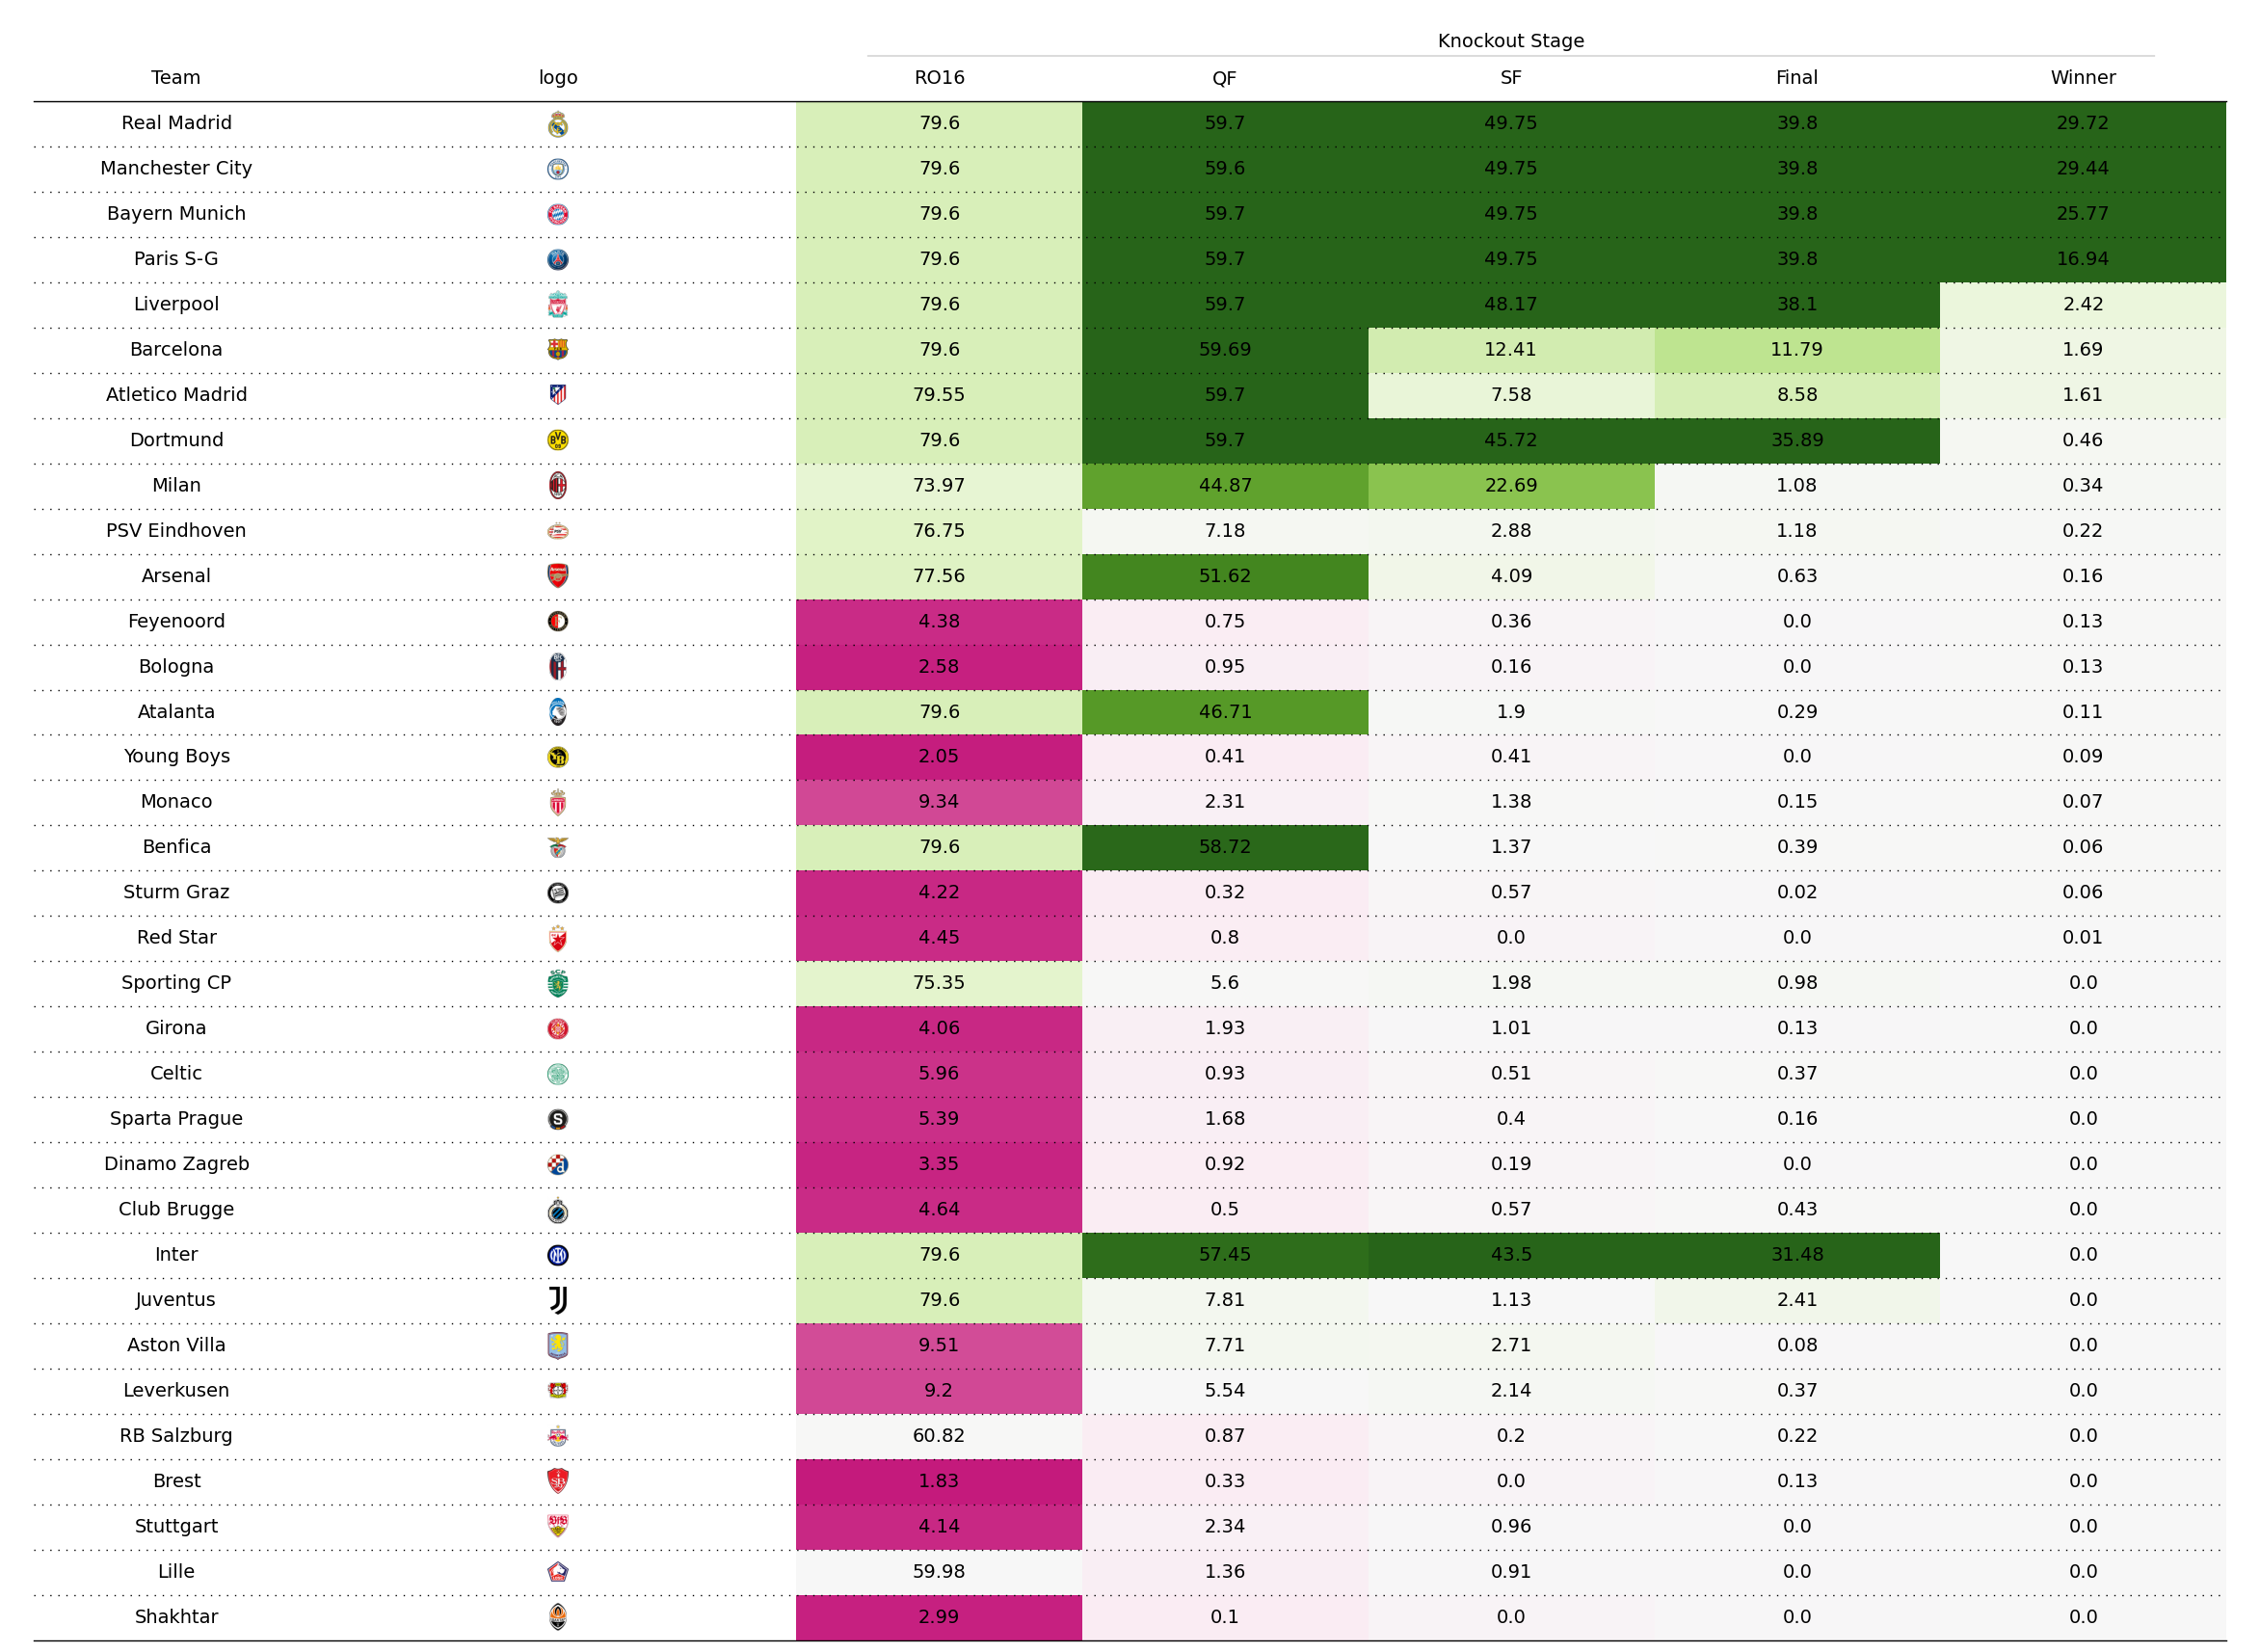

In [149]:
col_defs = [
    ColumnDefinition(
        name="Team",
        textprops={"ha": "center"},
        width=0.3, 
    ),
    ColumnDefinition(
        name="logo",
        textprops={"ha": "center", "va": "center", 'color': 'black'},  
        width=0.5,
        plot_fn=image, 
    ),
    ColumnDefinition(
        name= "RO16",
        group="Knockout Stage",
        textprops={"ha": "center"},
        width=0.3,  
        cmap=normed_cmap(df["RO16"], cmap=matplotlib.cm.PiYG, num_stds=2),  
    ),
    ColumnDefinition(
        name= "QF",
        group="Knockout Stage",
        textprops={"ha": "center"},
        width=0.3,  
        cmap=normed_cmap(df["QF"], cmap=matplotlib.cm.PiYG, num_stds=2),  
    ),
    ColumnDefinition(
        name="SF",
        group="Knockout Stage",
        textprops={"ha": "center"},
        width=0.3,  
        cmap=normed_cmap(df["SF"], cmap=matplotlib.cm.PiYG, num_stds=2),  
    ),
    ColumnDefinition(
        name="Final",
        group="Knockout Stage",
        textprops={"ha": "center"},
        width=0.3,  
        cmap=normed_cmap(df["Final"], cmap=matplotlib.cm.PiYG, num_stds=2),  
    ),
    ColumnDefinition(
        name= "Winner",
        group="Knockout Stage",
        textprops={"ha": "center"},
        width=0.3,  
        cmap=normed_cmap(df["Winner"], cmap=matplotlib.cm.PiYG, num_stds=2),  
    ),
]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(30, 22))

# Set global plot parameters
plt.rcParams["font.family"] = ["DejaVu Sans"]
plt.rcParams["savefig.bbox"] = "tight"

# Create the table
table = Table(
    df,
    column_definitions=col_defs,
    index_col='Team',
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 14},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 5, "linestyle": "-"}
)

# Show the figure
plt.show()